In [ ]:
# you are free to import any library you want/need
# in fact, you will probably need to import more libraries along the way
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logsumexp
from scipy.stats import norm, gamma, beta

# ***Assignment 1***
Welcome to Assignment 1! This is an ***individual*** assignment worth 15 points in total. Exercises 1 and 2 together can give you 5 points, while exercises 3 and 4 can give you 5 points each. There is a 5 point minimum for passing this assignment (you need to pass all four assignments to pass the course).

Submission details: Your submission should contain two pdf's.

1. A pdf version of your filled out colaboratory on Canvas. You can do this by pressing `cmd/ctrl+p` (you know the drill from there).  
2. For exercise 3, you need to hand in your hand-written solutions in a LaTeX pdf. We only accept solutions written in LaTeX, i.e. not Word or any other text editor. We recommend [Overleaf](https://overleaf.com), if you do not already have a favourite LaTeX editor (which is also [provided by KTH](https://intra.kth.se/en/it/programvara-o-system/programvara/installera/download/overleaf/overleaf-1.932755)).

# ***1. Sampling and visualization***

## 1.1 Common distributions
Below we have provided an itemized list of nine common probability distributions. Your task is to sample from **five** of the distributions, one at a time, while visualizing the distributions by plotting the samples in a histogram. For each distribution, $q(x)$, state its **support** and whether it's a **continuous or discrete distribution**. To familiarize yourself with the distributions, first play around with the parameter settings, and then plot $q(x)$ for two different parameter settings using subplots.

In order to sample from $q(x)$, we recommend you to use `numpy` or `sklearn`. Draw 50k samples. The simplest way to plot the distributions is by using `matplotlib`. If you want to make the plots more fancy we recommend you to check out [`seaborn`](https://seaborn.pydata.org/) or [`plotly`](https://plotly.com/python/). For visualization of the distributions using histograms, use ```bins=1000```.

### ***List of distributions***


*   $q(x) = \mathcal{N}(x|\mu, \sigma^2)$
*   $q(x) = \text{Poisson}(x|\lambda)$
*   $q(x) = \text{Exp}(x|\lambda)$
*   $q(x) = \text{Beta}(x|\alpha, \beta)$
*   $q(x) = \text{Gamma}(x|\alpha, \beta)$
*   $q(x) = \text{Dirichlet}(x_1, x_2, x_3|\alpha_1, \alpha_2, \alpha_3)$
*   $q(x) = \text{Categorical}(x|p_1, p_2, p_3)$

### **Normal distribution**
$q(x) = \mathcal{N}(x|\mu, \sigma^2)$

---


1. What is the support of q(x)?

The support of the Normal distribution is $\mathbb{R}$ (all real numbers), i.e., $(-\infty, +\infty)$.

2. Is q(x) continuous or discrete?

The Normal distribution is continuous.

3. Draw 50k samples from q(x) and visualize the distribution of the samples in the cell below for *two* parameter settings.

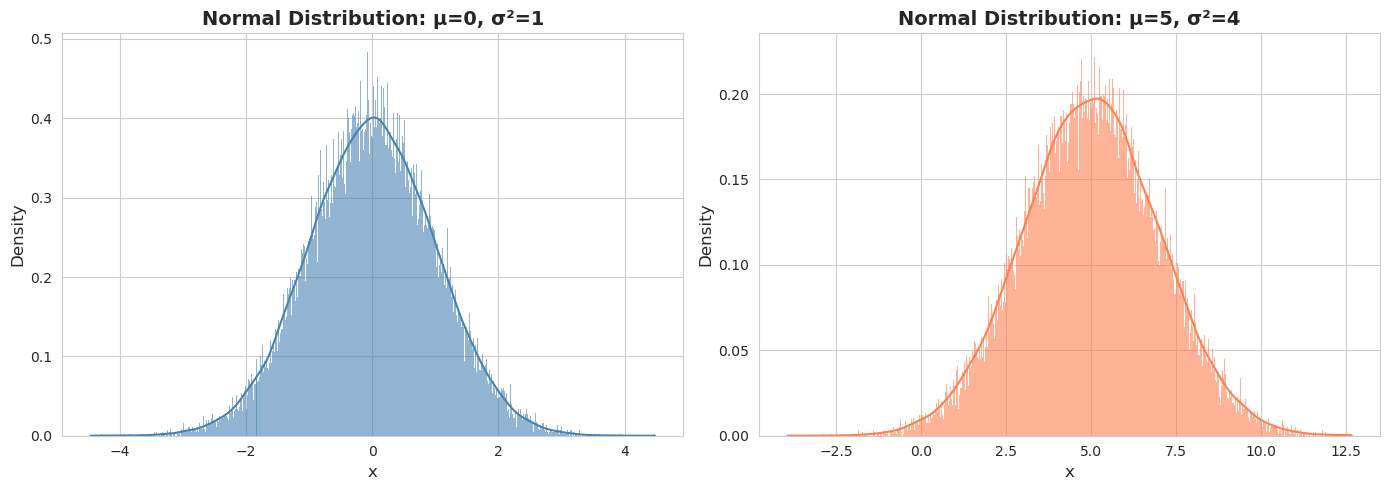

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
sns.set_style("whitegrid")
sns.set_palette("husl")
np.random.seed(42)
n_samples = 50000
bins = 1000

# Parameter setting 1: standard normal
mu1, sigma1 = 0, 1
samples1 = np.random.normal(mu1, sigma1, n_samples)

# Parameter setting 2: different mean and variance
mu2, sigma2 = 5, 2
samples2 = np.random.normal(mu2, sigma2, n_samples)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1
sns.histplot(samples1, bins=bins, stat='density', kde=True, ax=axes[0], 
             color='steelblue', edgecolor='none', alpha=0.6)
axes[0].set_title(f'Normal Distribution: μ={mu1}, σ²={sigma1**2}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)

# Plot 2
sns.histplot(samples2, bins=bins, stat='density', kde=True, ax=axes[1], 
             color='coral', edgecolor='none', alpha=0.6)
axes[1].set_title(f'Normal Distribution: μ={mu2}, σ²={sigma2**2}', fontsize=14, fontweight='bold')
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

plt.tight_layout()
plt.show()

*Which parameter values did you use in the two plots?*

In the first plot, I used parameters μ=0 and σ²=1 (standard normal distribution). In the second plot, I used parameters μ=5 and σ²=4.

---

### **Poisson distribution**
$q(x) = \text{Poisson}(x|\lambda)$

---


1. What is the support of q(x)?

The support of the Poisson distribution is $\mathbb{N}_0$ (the set of non-negative integers), i.e., {0, 1, 2, ...}.

2. Is q(x) continuous or discrete?

The Poisson distribution is discrete.

3. Sample from q(x) and visualize the distribution of the samples in the cell below for *two* parameter settings.

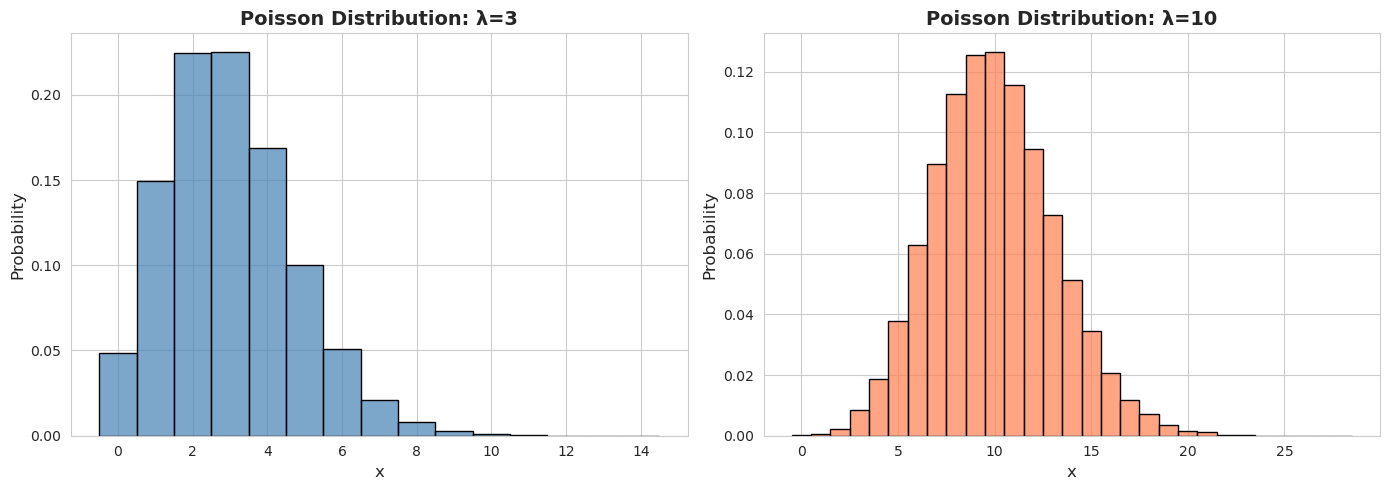

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
sns.set_style("whitegrid")
sns.set_palette("husl")
np.random.seed(42)
n_samples = 50000

# Parameter setting 1
lambda1 = 3
samples1 = np.random.poisson(lam=lambda1, size=n_samples)

# Parameter setting 2
lambda2 = 10
samples2 = np.random.poisson(lam=lambda2, size=n_samples)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1
# TODO: should I still use bins=1000 for discrete distributions?(ask teacher)
sns.histplot(samples1, stat='probability', discrete=True, ax=axes[0], 
             color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title(f'Poisson Distribution: λ={lambda1}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('Probability', fontsize=12)

# Plot 2
# TODO: should I still use bins=1000 for discrete distributions?(ask teacher)
sns.histplot(samples2, stat='probability', discrete=True, ax=axes[1], 
             color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title(f'Poisson Distribution: λ={lambda2}', fontsize=14, fontweight='bold')
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('Probability', fontsize=12)

plt.tight_layout()
plt.show()

*Which parameter value did you use?*

In the first plot, I used λ=3. In the second plot, I used λ=10.

---

### **Exponential distribution**
$q(x) = \text{Exp}(x|\lambda)$

---


1. What is the support of q(x)?

The support of the Exponential distribution is $[0, +\infty)$.

2. Is q(x) continuous or discrete?

The Exponential distribution is continuous.

3. Sample from q(x) and visualize the distribution of the samples in the cell below  for *two* parameter settings.

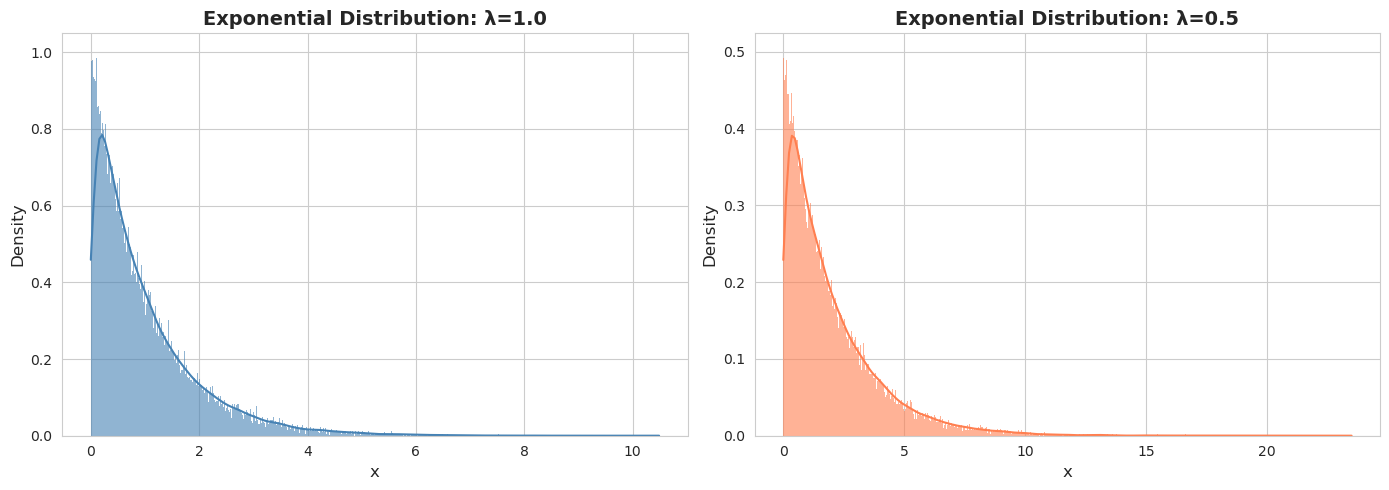

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
sns.set_style("whitegrid")
sns.set_palette("husl")
np.random.seed(42)
n_samples = 50000

# Parameter setting 1
lambda1 = 1.0
samples1 = np.random.exponential(scale=1/lambda1, size=n_samples)

# Parameter setting 2
lambda2 = 0.5
samples2 = np.random.exponential(scale=1/lambda2, size=n_samples)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1
sns.histplot(samples1, bins=1000, stat='density', kde=True, ax=axes[0], 
             color='steelblue', edgecolor='none', alpha=0.6)
axes[0].set_title(f'Exponential Distribution: λ={lambda1}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)

# Plot 2
sns.histplot(samples2, bins=1000, stat='density', kde=True, ax=axes[1], 
             color='coral', edgecolor='none', alpha=0.6)
axes[1].set_title(f'Exponential Distribution: λ={lambda2}', fontsize=14, fontweight='bold')
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

plt.tight_layout()
plt.show()

*Which parameter value did you use?*

In the first plot, I used λ=1.0. In the second plot, I used λ=0.5.

---

### **Beta distribution**
$q(x) = \text{Beta}(x|\alpha, \beta)$

---


1. What is the support of q(x)?

The support of the Beta distribution is the interval [0, 1].

2. Is q(x) continuous or discrete?

The Beta distribution is continuous.

3. Sample from q(x) and visualize the distribution of the samples in the cell below for *two* parameter settings.

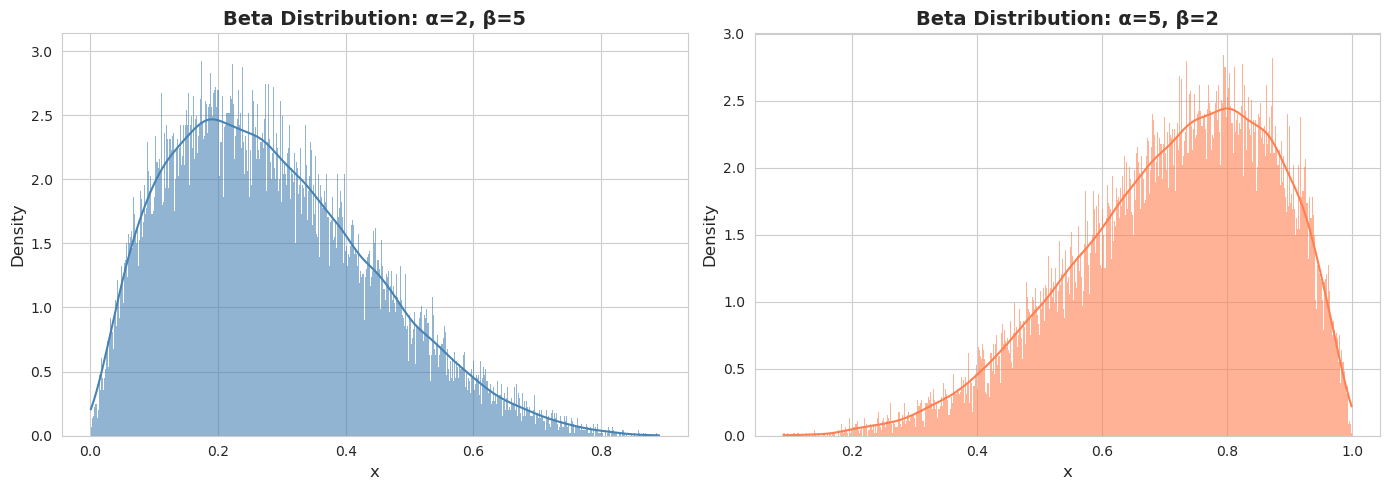

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
sns.set_style("whitegrid")
sns.set_palette("husl")
np.random.seed(42)
n_samples = 50000

# Parameter setting 1
alpha1, beta1 = 2, 5
samples1 = np.random.beta(a=alpha1, b=beta1, size=n_samples)

# Parameter setting 2
alpha2, beta2 = 5, 2
samples2 = np.random.beta(a=alpha2, b=beta2, size=n_samples)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Plot 1
sns.histplot(samples1, bins=1000, stat='density', kde=True, ax=axes[0], 
             color='steelblue', edgecolor='none', alpha=0.6)
axes[0].set_title(f'Beta Distribution: α={alpha1}, β={beta1}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)

# Plot 2
sns.histplot(samples2, bins=1000, stat='density', kde=True, ax=axes[1], 
             color='coral', edgecolor='none', alpha=0.6)
axes[1].set_title(f'Beta Distribution: α={alpha2}, β={beta2}', fontsize=14, fontweight='bold')
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

plt.tight_layout()
plt.show()

*Which parameter values did you use?*

In the first plot, I used parameters α=2 and β=5. In the second plot, I used parameters α=5 and β=2.

---

### **Gamma distribution**
$q(x) = \text{Gamma}(x|\alpha, \beta)$

---


1. What is the support of q(x)?

The support of the Gamma distribution is $[0, +\infty)$.

2. Is q(x) continuous or discrete?

The Gamma distribution is continuous.

3. Sample from q(x) and visualize the distribution of the samples in the cell below for *two* parameter settings.

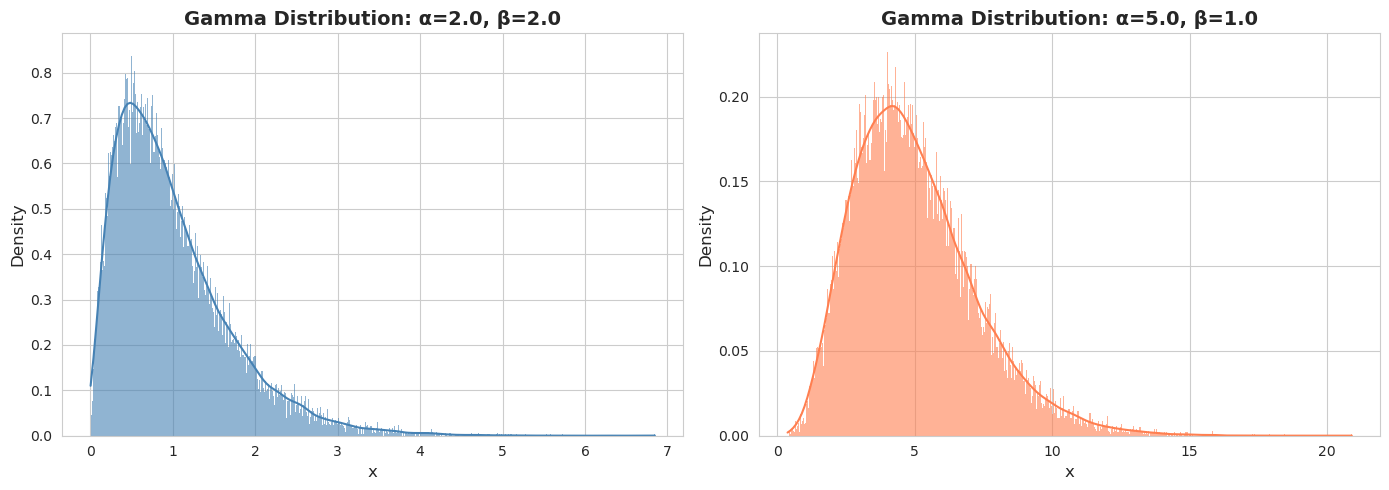

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
sns.set_style("whitegrid")
sns.set_palette("husl")
np.random.seed(42)
n_samples = 50000

# Parameter setting 1
alpha1, beta1 = 2.0, 2.0
samples1 = np.random.gamma(shape=alpha1, scale=1/beta1, size=n_samples)

# Parameter setting 2
alpha2, beta2 = 5.0, 1.0
samples2 = np.random.gamma(shape=alpha2, scale=1/beta2, size=n_samples)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1
sns.histplot(samples1, bins=1000, stat='density', kde=True, ax=axes[0], 
             color='steelblue', edgecolor='none', alpha=0.6)
axes[0].set_title(f'Gamma Distribution: α={alpha1}, β={beta1}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)

# Plot 2
sns.histplot(samples2, bins=1000, stat='density', kde=True, ax=axes[1], 
             color='coral', edgecolor='none', alpha=0.6)
axes[1].set_title(f'Gamma Distribution: α={alpha2}, β={beta2}', fontsize=14, fontweight='bold')
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

plt.tight_layout()
plt.show()

*Which parameter values did you use?*

In the first plot, I used parameters α=2.0 and β=2.0. In the second plot, I used parameters α=5.0 and β=1.0.

---

### **Dirichlet distribution**
$q(x) = \text{Dirichlet}(x_1, x_2, x_3|\alpha_1, \alpha_2, \alpha_3)$

**Important note**: the Dirichlet distribution is best visualized using a *simplex*, or a historgram with a *single* sample. See Fig. 2.14 or 2.15 in [Murphy's book](http://noiselab.ucsd.edu/ECE228/Murphy_Machine_Learning.pdf), respectively, for visualization examples.

---


1. What is the support of q(x)?

TODO: Do I need to do more? Already did 5
*Answer here*

2. Is q(x) continuous or discrete?

*Answer here*

3. Sample from q(x) and visualize the distribution of the samples in the cell below. Either using a simplex or a histogram with a single sample for *two* parameter settings.

In [ ]:
# Sample and visualize here

*Which parameter values did you use?*

*Answer here*

---

### **Categorical distribution**
$q(x) = \text{Categorical}(x|p_1, p_2, p_3)$

---


1. What is the support of q(x)?

*Answer here*

2. Is q(x) continuous or discrete?)

*Answer here*

3. Sample from q(x) and visualize the distribution of the samples in the cell below for *two* parameter settings.

In [ ]:
# Sample and visualize here

*Which parameter values did you use?*

*Answer here*

---

## 1.2 What if you are interested in a distribution which is not covered in the standard programming libraries?

Let $p(x)$ be a non-standard and unnormalized distribution, say

$p(x) = e^{-\alpha x} e^{-\lambda x}$, $x \geq 0$

then how can we sample from it? Although it is not a complex distribution, it is not available in `numpy` nor `sklearn`.

We can resolve the dilemma via a clever trick using the cumulative density function (CDF) and the uniform distribution, $\mathcal{U}([0,1])$. But first, you will need to normalize $p(x)$.

Read the instructions in Murphy (ch. 23.2.1) to sample from the normalized $p(x)$. Use $\alpha=0.5$ and $\lambda=1.0$ and visualize the samples below in the same manner as you have done above (but for a single parameter setting, obviously). Also, include your derivation in the text cell below.

**Hint:** to normalize a distribution, you need to compute the normalizing constant $$C=\int_{\mathbb{R}} p(x) dx,$$
such that
$$\int_{\mathbb{R}} p(x) / C dx = 1.$$

*Put derivations here*

In [ ]:
# code to sample from and visualize p(x) here

# ***2. Simple Density Estimation***

In the literature empirical distributions are often assumed to be approximately Gaussian/Normal for plenty of (often good) reasons. The central limit theorem tells us that this is an appropriate assumption for large amounts of data (under mild conditions), and, furthermore, the Normal distribution is very well-studied.

But, of course, assuming normality is far from the best idea in a lot of cases. In this section we will do analysis on a non-Gaussian and non-standard distribution. Assuming we are constrained to choose one of the common distributions in the list of distributions above, which distribution is the best match to the non-standard one? How can we motivate this choice? This is a simple form of density estimation -- the first practical encounter of it in this course.

## 2.1 Analyze $p(x)$

Use `np.load` to load the distribution, $p(x)$, provided in `ass1_dist.npy`.

Visualize $p(x)$ using a histogram starting with `bins=1000`. Then, play around with the number of bins in order to be able to answer the two following questions:

1.   What is a reasonable assumption regarding the support of $p(x)$. Motivate.

*Answer here*

2.   Do you think $p(x)$ is best described by a continuous or discrete pdf based on the visualized samples? Explain your thinking.

*Answer here*

## 2.2. Fit $q(x)$ to $p(x)$

Now, based on your conclusions in 2.1 (support and contiuous or discrete pdf), and given the set of distributions itemized in section 1.1, choose three $q(x)$ and match them to $p(x)$. For each of your three choices, match them by


1.   visualizing both $p(x)$ and $q(x)$ in the same histogram.
2.   using ``` scipy.stats``` to compute the log-likelihood of the data (the samples from $p(x)$) for $q(x)$. Maximize the log-likelihoods of the data for your choice of $q(x)$ by **manually** tuning and reporting its parameters.

# ***3. Paper and pen exercises***

***Before starting with the pen and paper exercise, note that you are asked to submit your solutions for 3.1, 3.2 and 3.3 using LaTeX. Download the LaTeX file (the pdf) and submit it to Canvas together with the a pdf version of this notebook.***

Here you are tasked with solving three pen and paper exercises. The two first exercises concern exact marginal likelihood inference, and aim to highlight that, indeed, there are cases where exact inference is acheivable. In these exercises, the marginal likelihoods are discrete and computed using enumeration, i.e., enumerating and summing over all possible outcomes. However, as you can imagine, enumeration is possible in far from all settings. In fact, we are often interested computing marginal likelihoods which requiring marginalization over extremely many, or even infinitely many, dimensions/outcomes.  We will see how to handle these cases later in the course.


Finally, in the last exercise, you are asked to compute the posterior predictive distribution. An important technique for doing Bayesian model averaging.

## 3.1 Deriving the Log-Normal pdf using the transformation theorem
Using the Gaussian pdf, $p(x) = \mathcal{N}(x|\mu, \sigma^2)$, as base distribution and the exponential function as your bijective mapping, derive the Log-Normal pdf using the transformation theorem.

See the slides from lecture 2 for more details. Explain and motivate the result.

## 3.2 Exact marginal likelihood inference (Burglars and earthquakes)
(After Pearl, 1988) You live in a seismologically instable region and are commuting to work every day. One day your neighbor calls you whilst on your way home to let you know that your burglar alarm is ringing. Since you always parse the world through the lens of probability theory, the first question that pops into your head is, of course: **what's the probability that there's actually been a burglary in my home?** Interrupted in your Bayesian thoughts, you hear the radio saying that there's been an earthquake in the region. Aha, we are now dealing with a conditional probabilty! **Could the alarm have been triggered by the earthquake?**


You repeat the events and assign them variables: $a$ (the burglar alarm is ringing), $e$ (there's been an earthquake), $b$ (there's been a burglar in your home), $c$ (you received a phone call from you nehighbor), and $r$ (you heard the radio informing about the earthquake). The joint probabilty of these variables can be written and factorized as follows (using some independance assumptions)

$p(a, b, e, c, r) =  p(b) \; p(e) \; p(a|b, e) \; p(r|e) \; p(c|a)$.

In terms of the introduced variables, we are interested in calculating the probability $p(b|e=1, a=1)$.

Next you assign reasonable values to these probabilities based on region-specific statistics you have come across. Apparently, there's an earthquake in the region every third year, giving

$p(e=1) = \epsilon = $ *fill in value*,

and there's a burglary every second year

$p(b=1) = \beta = $ *fill in value*.

Also, you know that the recall of the alarm is $\alpha_b = 0.99$. That is, when burglars break in to your home, the alarm rings in 99% of the cases. You estimate that $1/100$ of all alarms are triggered by earthquakes, $\alpha_e = 0.01$, and that the alarm rings for some other unknown reason with probability $1/1000$, $f=0.001$. You conclude that these are the only reasons that the alarm could possibly ring.

*List all possible values for $p(a|b, e)$, i.e. $p(a=1|b=1, a=1)$ etc.*

Proceed by assuming that your neighbor would never call you unless the alarm was ringing, and that the news reporter on the radio is fully reliable. Then, derive the posterior distribution $p(b, e|a=1)$ using Bayes' theorem.

Finally we are able to answer our question: given all you know, what is the probability that there is a burglar in your home? *Compute $p(b=1|e=1,a=1)$. Importantly, clearly state when you use Bayes' theorem (rule), and when you use the law of total probability. I.e., wright it out explicitly.*

Comment: the point of this exercise it to demonstrate that computing the marginal likelihood is tedious–even when there are only a few binary variables. More complicated settings will make the computation of the marginal likelihood intractable, and so we will need the techniques that we will discuss later in the course.

## 3.3 Posterior Predictive
(Murphy, exercise 3.14) *Posterior predictive for Dirichlet-multinomial*

(i) Suppose we compute the empirical distribution over letters of the Roman alphabet plus the
space character (a distribution over 27 values) from 2000 samples. Suppose we see the
letter ”e” 260 times. What is $p(x_{2001}=e|D)$, if we assume $\theta \sim Dir(\alpha_1,..., \alpha_{27})$, where $\alpha_k = 10$ for all $k$?

(ii) Suppose, in the 2000 samples, we saw ”e” 260 times, ”a” 100 times, and ”p” 87 times. What is $p(x_{2001}=e, x_{2002}=a|D)$, if we assume $\theta \sim Dir(\alpha_1,..., \alpha_{27})$, where $\alpha_k = 10$ for all $k$? Show your work.

# ***4. Monte Carlo Simulation***
Monte Carlo methods is a very useful class of inference methods for sampling-based approximations. This course largely focuses on Monte Carlo methods for approximating unknown and/or intractable functions/distributions. In this assignment we study some of the building blocks of Monte Carlo methods: the effect of law of large numbers, Monte Carlo sampling for approximating a function, and importance sampling.

## 4.1 Approximate the mean of a LogNormal distribution using the Law of Large Numbers
The LogNormal is a very important distribution, which can be used to model the distribution of quantities such as time, the values of purchases, or distances.

Here we assume that we are sequentially obtaining data that we believe are coming from a LogNormal distribution. Eventually, we will receive a sufficient amount of data to accurately approximate the true mean of the LogNormal distribution. This follows from the Law of Large Numbers:

Let, $$a = \mathbb{E}_{p(x)}[g(x)]$$ and $$\hat{a}_n = \frac{1}{n}\sum_{i=1}^nx_i,$$ where $x_i\sim p(x)$, then $$\lim_{n→\infty}\hat{a}_n = a.$$ Meanwhile, for all finite (natural) numbers of $n$, we say that $$\hat{a}_n\approx a,$$ or, in words, $\hat{a}_n$ is a Monte Carlo estimate of $a$.

To sample from a LogNormal, use the following scheme.

Let $$z_i \sim \mathcal{N}(\mu, \sigma^2),$$ and set $$x_i = \exp(z_i).$$ This is equivalent to sampling $x_i$ from $\log\mathcal{N}(\mu, \sigma^2)$.

### 4.1.1

Let $\mu = 1$ and $\sigma^2 = 5$, and set $p(x|\mu, \sigma^2) = \log\mathcal{N}(\mu, \sigma^2)$. Compute the mean of the LogNormal distribution in the cell below. This should be done using the expression for the mean of the LogNormal (i.e., do not approximate it). *Hint: it's not equal to $\mu$*.

$m = \mathbb{E}_{p(x|\mu, \sigma^2)}[x] =$ *Answer here*

### 4.1.2
Use the provided plotting function to plot how the Monte Carlo approximation improves with more data.

First you will need to sample $n=100,000$ samples from $p(x|\mu, \sigma^2)$ using numpy and the scheme provided above. Observe that when sampling from a normal distribution in numpy, the second argument is the standard deviation not the variance.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def plot_means(m, data):
    # data should be an n long array
    n = len(data)
    sequential_estimates = []
    for i in range(1, n + 1):
        m_hat_i =  # compute the monte carlo approximation of m using only
        # the data points x_1,..., x_i
        sequential_estimates.append(m_hat_i)
    plt.plot(sequential_estimates, label=r'$\hat{m}_i$')
    plt.axhline(m, 0, n, color='red', label='$m$')
    plt.legend(loc='best')
    plt.show()

np.random.seed(0)  # don't change the seed
# code the sampling scheme below here (it's important that you use the provided seed)

### 4.1.3
Repeat the experiment above but now use $\sigma^2 = 1$. Plot the approximations, and explain why the approximations converge with less data. Reflect on the limitation of the Law of Large Numbers here.

*Answer here*

## 4.2 Approximating a function using Monte Carlo Approximation

Say that there is a competition where people are rewarded for exiting a maze as fast as possible. The distribution of the time it takes for a competitor to exit the maze follows a LogNormal distribution with $\mu=5$ and $\sigma^2 = 1$.

You design a prize function, rewarding competitors that make it out of the maze faster: $$g(x) = 1000\exp(-x / 10).$$

On average, what is the reward that the organizers will have to pay? Approximate the quantity using Monte Carlo approximation.

*Answer here*

The organizers have a budget of 10,000 SEK, and want as many competitors to participate as possible. They ask you to tell them what the maximum number of competitors, $C^*$, is, such that the budget is maintaned with 90% probability, i.e. $$\mathbb{P}\left(\sum_{i=1}^{C} g(x_i) < 10000\right) < 0.9.$$

Demonstrate that your estimate is robust by including the standard deviation of your estimate.

*Hint: Use the identity that $\mathbb{P}(\mathbb{1}_{\{y < k\}}(y)) = \mathbb{E}_{p(y)}[y < k]$.*

*Answer here*

## 4.3 Plot a disk using importance sampling
In the lectures we covered importance sampling (IS) as an alternative to standard Monte Carlo sampling. IS is a simple and flexible solution when a distribution of interest is difficult, or impossible, to sample from.

In this assignment, let $p(x)$ be a disk with all its probability density uniformly distributed on it. Let it have 0.5 radius, $r=0.5$, and be centered in (0, 0). It is not impossible to sample from $p(x)$ directly–it would most likely require the transformation theorem or another trick.

Instead of sampling from $p(x)$ directly, we can easily sample from a Normal distribution. Let the proposal distribution, $q(x)$, be a Normal distribution with $\mu=(0,0)^T$ and $\Sigma=\begin{pmatrix}0.5 & 0\\0 & 0.5\end{pmatrix}$. Samples drawn from a proposal distribution in IS are called *importance samples*.

Assignment:

1.  Model the target pdf, $p(x)$. You can use an indicator function. Be clear about what the corresponding "indicator" set is.

2.  Draw 20k importance samples from $q(x)$ and compute the corresponding *importance weights*, using $p(x)$ as the target distribution.

3.  Plot the importance samples in a scatter plot, using the corresponding importance weights as colors for the different points. The result should be a non-uniform distribution over the disk. Why is it non-uniform? Explain the distribution of importance weights.

4. How can you change the parameters in $q(x)$ in order to make the distribution of importance weights more uniform over the disk?

*Express the resulting likelihood function from 1 here.*

In [ ]:
# compute the importance weights and plot the colored points here

*Answer the questions in 3 here.*

*Answer question 4 here.*